# **CIFAR10 CNN**

In [1]:
from tensorflow.keras.datasets import cifar10
from matplotlib import pyplot as plt
from tensorflow import keras
import tensorflow.compat.v2 as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical as tcg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D ,Dropout

In [2]:
(xtr,ytr),(xte,yte)=cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
xtr.shape

(50000, 32, 32, 3)

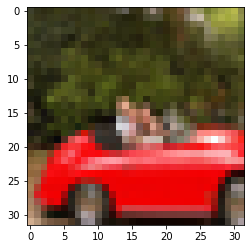

In [4]:
plt.imshow(xtr[99], cmap='gray')

In [5]:
ytr[99]

array([1], dtype=uint8)

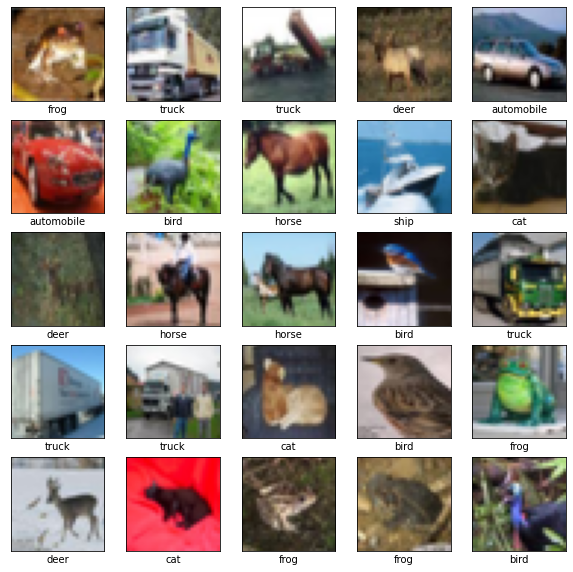

In [6]:
label = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xtr[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(label[ytr[i][0]])
plt.show()

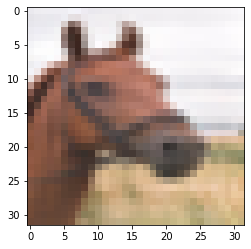

In [7]:
plt.imshow(xte[99], cmap='gray')

In [8]:
yte[99]

array([7], dtype=uint8)

In [9]:
ytr=tcg(ytr)
yte=tcg(yte)

In [10]:
xte=xte.reshape(xte.shape[0],xte.shape[1],xte.shape[2],3).astype('float32')/255
xtr=xtr.reshape(xtr.shape[0],xtr.shape[1],xtr.shape[2],3).astype('float32')/255

In [11]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.5))


model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [13]:
history = model.fit(xtr,ytr, validation_data=(xte,yte),epochs=15, batch_size=128)

Epoch 1/15
391/391 [==============================] - 2s 6ms/step - loss: 1.8098 - accuracy: 0.3269 - val_loss: 1.4407 - val_accuracy: 0.4820
Epoch 2/15
391/391 [==============================] - 2s 5ms/step - loss: 1.4508 - accuracy: 0.4730 - val_loss: 1.2889 - val_accuracy: 0.5374
Epoch 3/15
391/391 [==============================] - 2s 5ms/step - loss: 1.3334 - accuracy: 0.5211 - val_loss: 1.1595 - val_accuracy: 0.6037
Epoch 4/15
391/391 [==============================] - 2s 5ms/step - loss: 1.2632 - accuracy: 0.5513 - val_loss: 1.1333 - val_accuracy: 0.6025
Epoch 5/15
391/391 [==============================] - 2s 5ms/step - loss: 1.2153 - accuracy: 0.5643 - val_loss: 1.0686 - val_accuracy: 0.6260
Epoch 6/15
391/391 [==============================] - 2s 5ms/step - loss: 1.1723 - accuracy: 0.5818 - val_loss: 1.0287 - val_accuracy: 0.6406
Epoch 7/15
391/391 [==============================] - 2s 5ms/step - loss: 1.1334 - accuracy: 0.5969 - val_loss: 0.9843 - val_accuracy: 0.6574
Epoch 

In [14]:
model.evaluate(xtr,ytr)

1563/1563 [==============================] - 4s 2ms/step - loss: 0.7263 - accuracy: 0.7525


[0.726324200630188, 0.7525399923324585]

In [15]:
score = model.evaluate(xte,yte)

313/313 [==============================] - 1s 2ms/step - loss: 0.8631 - accuracy: 0.6986


In [16]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8630611300468445
Test accuracy: 0.6985999941825867


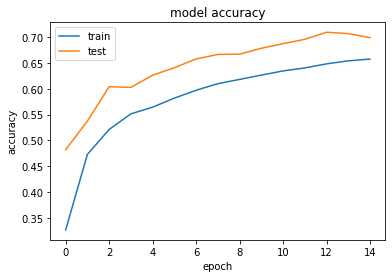

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

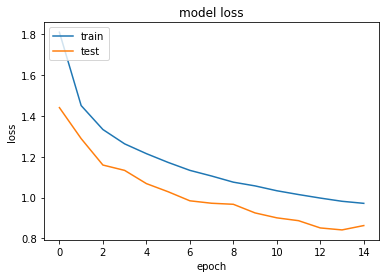

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
model.save("cifar.cnn.h5")





In [20]:
model.load_weights("cifar.cnn.h5")

In [21]:
loaded_model = tf.keras.models.load_model("cifar.cnn.h5")

loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [22]:
import tensorflow.compat.v2 as tf

In [23]:
model = tf.keras.models.load_model('/content/cifar.cnn.h5')

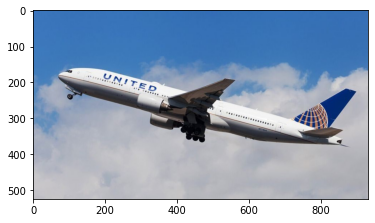

In [25]:
import cv2
img = cv2.imread("/content/united-airlines-istock.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [26]:
img.shape

(524, 931, 3)

In [27]:
inp_shape=(32,32,3)
img.resize(inp_shape)
img.shape

(32, 32, 3)

In [28]:
img = img.reshape((1,32,32,3))
print(img.shape)

(1, 32, 32, 3)


In [30]:
import numpy as np
labels= ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
i=np.argmax(model.predict(img))
p=labels[i]
print("Predicted label: " + p)

Predicted label: airplane


In [31]:
print("Predicted Sign" + str(loaded_model.predict(img)))

Predicted Sign[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


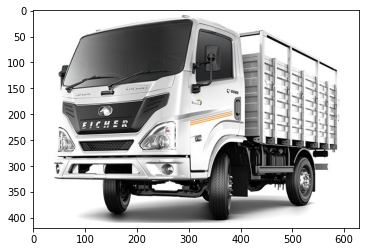

In [33]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("/content/eicher-pro-2049-68655.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [34]:
img.shape

(420, 630, 3)

In [35]:
inp_shape=(32,32,3)
img.resize(inp_shape)
img.shape

(32, 32, 3)

In [36]:
img = img.reshape((1,32,32,3))
print(img.shape)

(1, 32, 32, 3)


In [37]:
import numpy as np
labels= ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
i=np.argmax(model.predict(img))
p=labels[i]
print("Predicted label: " + p)

Predicted label: airplane


In [38]:
print("Predicted Sign" + str(loaded_model.predict(img)))

Predicted Sign[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
!pip install pyngrok

In [ ]:
!pip install streamlit

In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow.compat.v2 as tf
from PIL import Image , ImageOps
import cv2
import numpy as np
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

st.set_option('deprecation.showfileUploaderEncoding',False)
@st.cache(allow_output_mutation=True)
def lm():

 model = tf.keras.models.load_model('/content/cifar.cnn.h5')
 return model

model = lm()

st.write("""
# Cifar 10 Clasifier
""")
file = st.file_uploader("Upload an Image",type=['jpeg','jpg','png'])

def import_and_predict(image_data,model):
  
 size=(32,32)
 img = ImageOps.fit(image_data,size,Image.ANTIALIAS)
 img = np.asarray(img)
 img = img[np.newaxis,...]
 l = np.argmax(model.predict(img))
 i = labels[l]
 return i

if file is None:
 st.text("Pls upload image")
else:
 image = Image.open(file)
 st.image(image,use_column_width=True)
 p = import_and_predict(image,model)
 st.success(str(p))

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

In [ ]:
!unzip /content/ngrok-stable-linux-amd64.zip

In [ ]:
!./ngrok authtoken 1gXagyREVZG8UEArEmla3g8urHp_7r2v3jmN7PjoHhvwmCT2P

In [ ]:
!nohup streamlit run app.py &

In [ ]:
from pyngrok import ngrok
url = ngrok.connect(port=8501)
url